In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os.path 
from tabulate import tabulate #to export in table format

In [2]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,201)

In [3]:
surf = pd.read_csv("SN2012fr_diss.dat", sep = '\s+', header = None)

In [4]:
spec = pd.Series(surf[0])
spec_errors = pd.Series(surf[1])

In [5]:
spec = np.reshape(np.array(spec), (201, 61)).T
spec_errors = np.reshape(np.array(spec_errors), (201, 61)).T

In [6]:
N = 10
plotspecs = np.linspace(0, 60, N, dtype = int)
plotspecs = plotspecs[::-1] #to invert

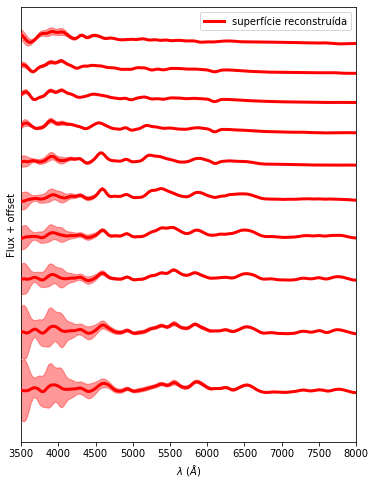

In [7]:
offset = 0
plt.figure(figsize=(6, 8))
for i in range(N):

    if i == 0:
        
        plt.fill_between(y, spec[plotspecs[i]]/max(spec[plotspecs[i]]) + offset + spec_errors[plotspecs[i]]/max(spec[plotspecs[i]]),  spec[plotspecs[i]]/max(spec[plotspecs[i]]) + offset - spec_errors[plotspecs[i]]/max(spec[plotspecs[i]]), alpha=0.4, color='r')

        plt.plot(y, spec[plotspecs[i]]/max(spec[plotspecs[i]]) + offset, 'r', lw=3, zorder=9, label = 'superfície reconstruída')
    
    else:
        
        
        plt.fill_between(y, spec[plotspecs[i]]/max(spec[plotspecs[i]]) + offset + spec_errors[plotspecs[i]]/max(spec[plotspecs[i]]),  spec[plotspecs[i]]/max(spec[plotspecs[i]]) + offset - spec_errors[plotspecs[i]]/max(spec[plotspecs[i]]), alpha=0.4, color='r')

        plt.plot(y, spec[plotspecs[i]]/max(spec[plotspecs[i]]) + offset, 'r', lw=3, zorder=9)
    

    offset += max(spec[plotspecs[i]]/max(spec[plotspecs[i]])) + max(spec_errors[plotspecs[i]]/max(spec[plotspecs[i]])) + 1
    
plt.yticks([])
plt.xlabel("$\lambda$ ($\AA$)")
plt.ylabel("Flux + offset")
plt.xlim(3500, 8000)
#plt.xlim(0, 10)
plt.legend(loc="upper right")
plt.savefig("spec2012fr.png", dpi = 200)   # save the figure to file
plt.show()

In [8]:
xdf = []
ydf = []
zdf = []

for i in range(0, len(spec)):
    
    for j in range(0, len(spec[0])):
        
        xdf.append(x[i])
        ydf.append(y[j])
        zdf.append(spec[i][j])

In [9]:
zdf = zdf/max(zdf)

In [10]:
table = []
for l in range(0,len(xdf)):
    
    table.append((xdf[l], ydf[l], zdf[l]))

In [11]:
name_of_file = 'sn2012fr' 
save_path = '/home/joao/Documents/'

completeName = os.path.join(save_path, name_of_file + ".dat")      

f = open(completeName, 'w')               
#f.write(header + "\n")
f.write(tabulate(table, tablefmt="plain"))
f.close()